In [1]:
import os, sys
base_dir = os.path.join(os.getcwd(), '..')
sys.path.append(base_dir)

In [2]:
from trainer.data import make_dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = make_dataset('../data/processed/boundary/tfrecords', 128, 'test')

W0727 09:41:53.174690 140376627009344 deprecation_wrapper.py:119] From /home/fghavamian/Documents/cnn_battery/notebooks/../trainer/data.py:18: The name tf.parse_single_example is deprecated. Please use tf.io.parse_single_example instead.

W0727 09:41:53.175484 140376627009344 deprecation_wrapper.py:119] From /home/fghavamian/Documents/cnn_battery/notebooks/../trainer/data.py:6: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.



../data/processed/boundary/tfrecords
['../data/processed/boundary/tfrecords/test_0.tfrecords']


In [4]:
# data = data.batch(16).repeat(0)

In [5]:
dir(dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_as_variant_tensor',
 '_checkpoint_dependencies',
 '_component_metadata',
 '_consumers',
 '_dataset',
 '_deferred_dependencies',
 '_element_structure',
 '_from_components',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_inputs',
 '_is_graph_tensor',
 '_list_functions_for_serialization',
 '_lookup_dependency',

In [10]:
dataset.list_files()

TypeError: list_files() missing 1 required positional argument: 'file_pattern'

In [5]:
d, f = dataset.make_one_shot_iterator().get_next()

with tf.Session() as sess:
    d_, f_ = sess.run([d, f])


W0727 08:54:46.175607 139713821173568 deprecation.py:323] From <ipython-input-5-6baed7f712f7>:1: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [6]:
d_.keys(), f.keys()

(dict_keys(['feature', 'mask', 'name']), dict_keys(['prediction']))

In [7]:
d_['name'][0]

b'Rc_1.0_h_67.7_tac_10.0_tel_12.3'

In [8]:
grid_points_x = np.linspace(0, 20, 64)
grid_points_y = np.linspace(0, 100, 512)

x_grid, y_grid = np.meshgrid(grid_points_x, grid_points_y)

In [9]:
x_grid.shape, d_['feature'].shape

((512, 64), (10, 512, 64, 12))

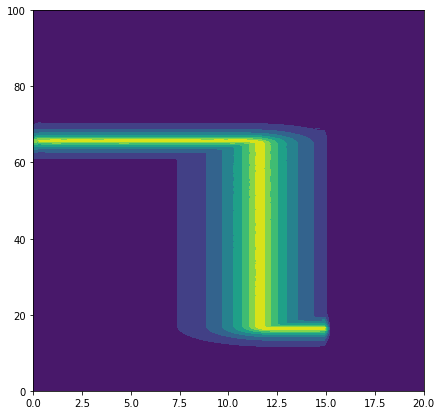

In [10]:
plt.figure(figsize=(7, 7))
plt.contourf(x_grid, y_grid, d_['feature'][0, :, :, 8])

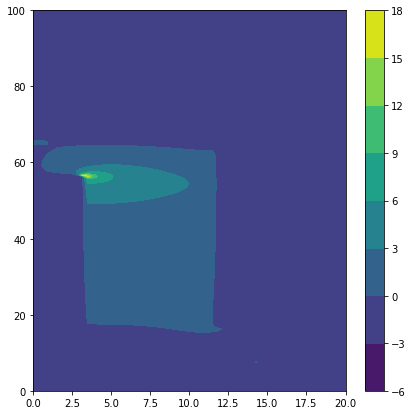

In [11]:
plt.figure(figsize=(7, 7))
ax = plt.contourf(x_grid, y_grid, f_['prediction'][0, :, :, 11])
plt.colorbar(ax)

In [12]:
d_['name']

array([b'Rc_1.0_h_67.7_tac_10.0_tel_12.3',
       b'Rc_1.0_h_27.2_tac_10.0_tel_10.4',
       b'Rc_1.0_h_93.2_tac_10.0_tel_12.3',
       b'Rc_1.0_h_62.7_tac_10.0_tel_5.3',
       b'Rc_1.0_h_74.6_tac_10.0_tel_7.3',
       b'Rc_1.0_h_49.3_tac_10.0_tel_18.0',
       b'Rc_1.0_h_36.5_tac_10.0_tel_11.0',
       b'Rc_1.0_h_60.5_tac_10.0_tel_19.3',
       b'Rc_1.0_h_25.9_tac_10.0_tel_16.2',
       b'Rc_1.0_h_33.2_tac_10.0_tel_15.9'], dtype=object)